In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import plotly.express as px

In [2]:
df = pd.read_csv("appdata10.csv")
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user,50000.0,186889.72990,107768.520361,13.0,93526.75,187193.5,279984.25,373662.0
dayofweek,50000.0,3.02986,2.031997,0.0,1.00,3.0,5.00,6.0
age,50000.0,31.72436,10.803310,16.0,24.00,29.0,37.00,101.0
numscreens,50000.0,21.09590,15.728812,1.0,10.00,18.0,28.00,325.0
minigame,50000.0,0.10782,0.310156,0.0,0.00,0.0,0.00,1.0
used_premium_feature,50000.0,0.17202,0.377402,0.0,0.00,0.0,0.00,1.0
enrolled,50000.0,0.62148,0.485023,0.0,0.00,1.0,1.00,1.0
liked,50000.0,0.16500,0.371184,0.0,0.00,0.0,0.00,1.0


In [5]:
df.nunique()

user                    49874
first_open              49747
dayofweek                   7
hour                       24
age                        78
screen_list             38799
numscreens                151
minigame                    2
used_premium_feature        2
enrolled                    2
enrolled_date           31001
liked                       2
dtype: int64

In [9]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [10]:
df["screen_list"] = df.screen_list.astype(str) + ","

In [12]:
df["num_screen"] = df.screen_list.str.count(",")

In [24]:
df.hour = df.hour.str.slice(1,3).astype(int)

In [27]:
df_numberic = df.drop(columns= ["user", "first_open", "screen_list", "enrolled_date"], inplace=False)

In [28]:
df

,user,first_open,dayofweek,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,liked,num_screen
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",0,0,0,NaN,0,13
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaN,0,11
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan,",0,1,0,NaN,1,3
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",0,0,1,2013-07-05 16:11:49.513,0,17
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",0,0,1,2013-02-26 18:56:37.841,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",0,0,1,2013-05-09 13:47:52.875,0,11
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer,",0,1,0,NaN,0,4
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaN,0,10
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",0,0,1,2013-04-28 12:35:38.709,0,19


<Figure size 432x288 with 0 Axes>

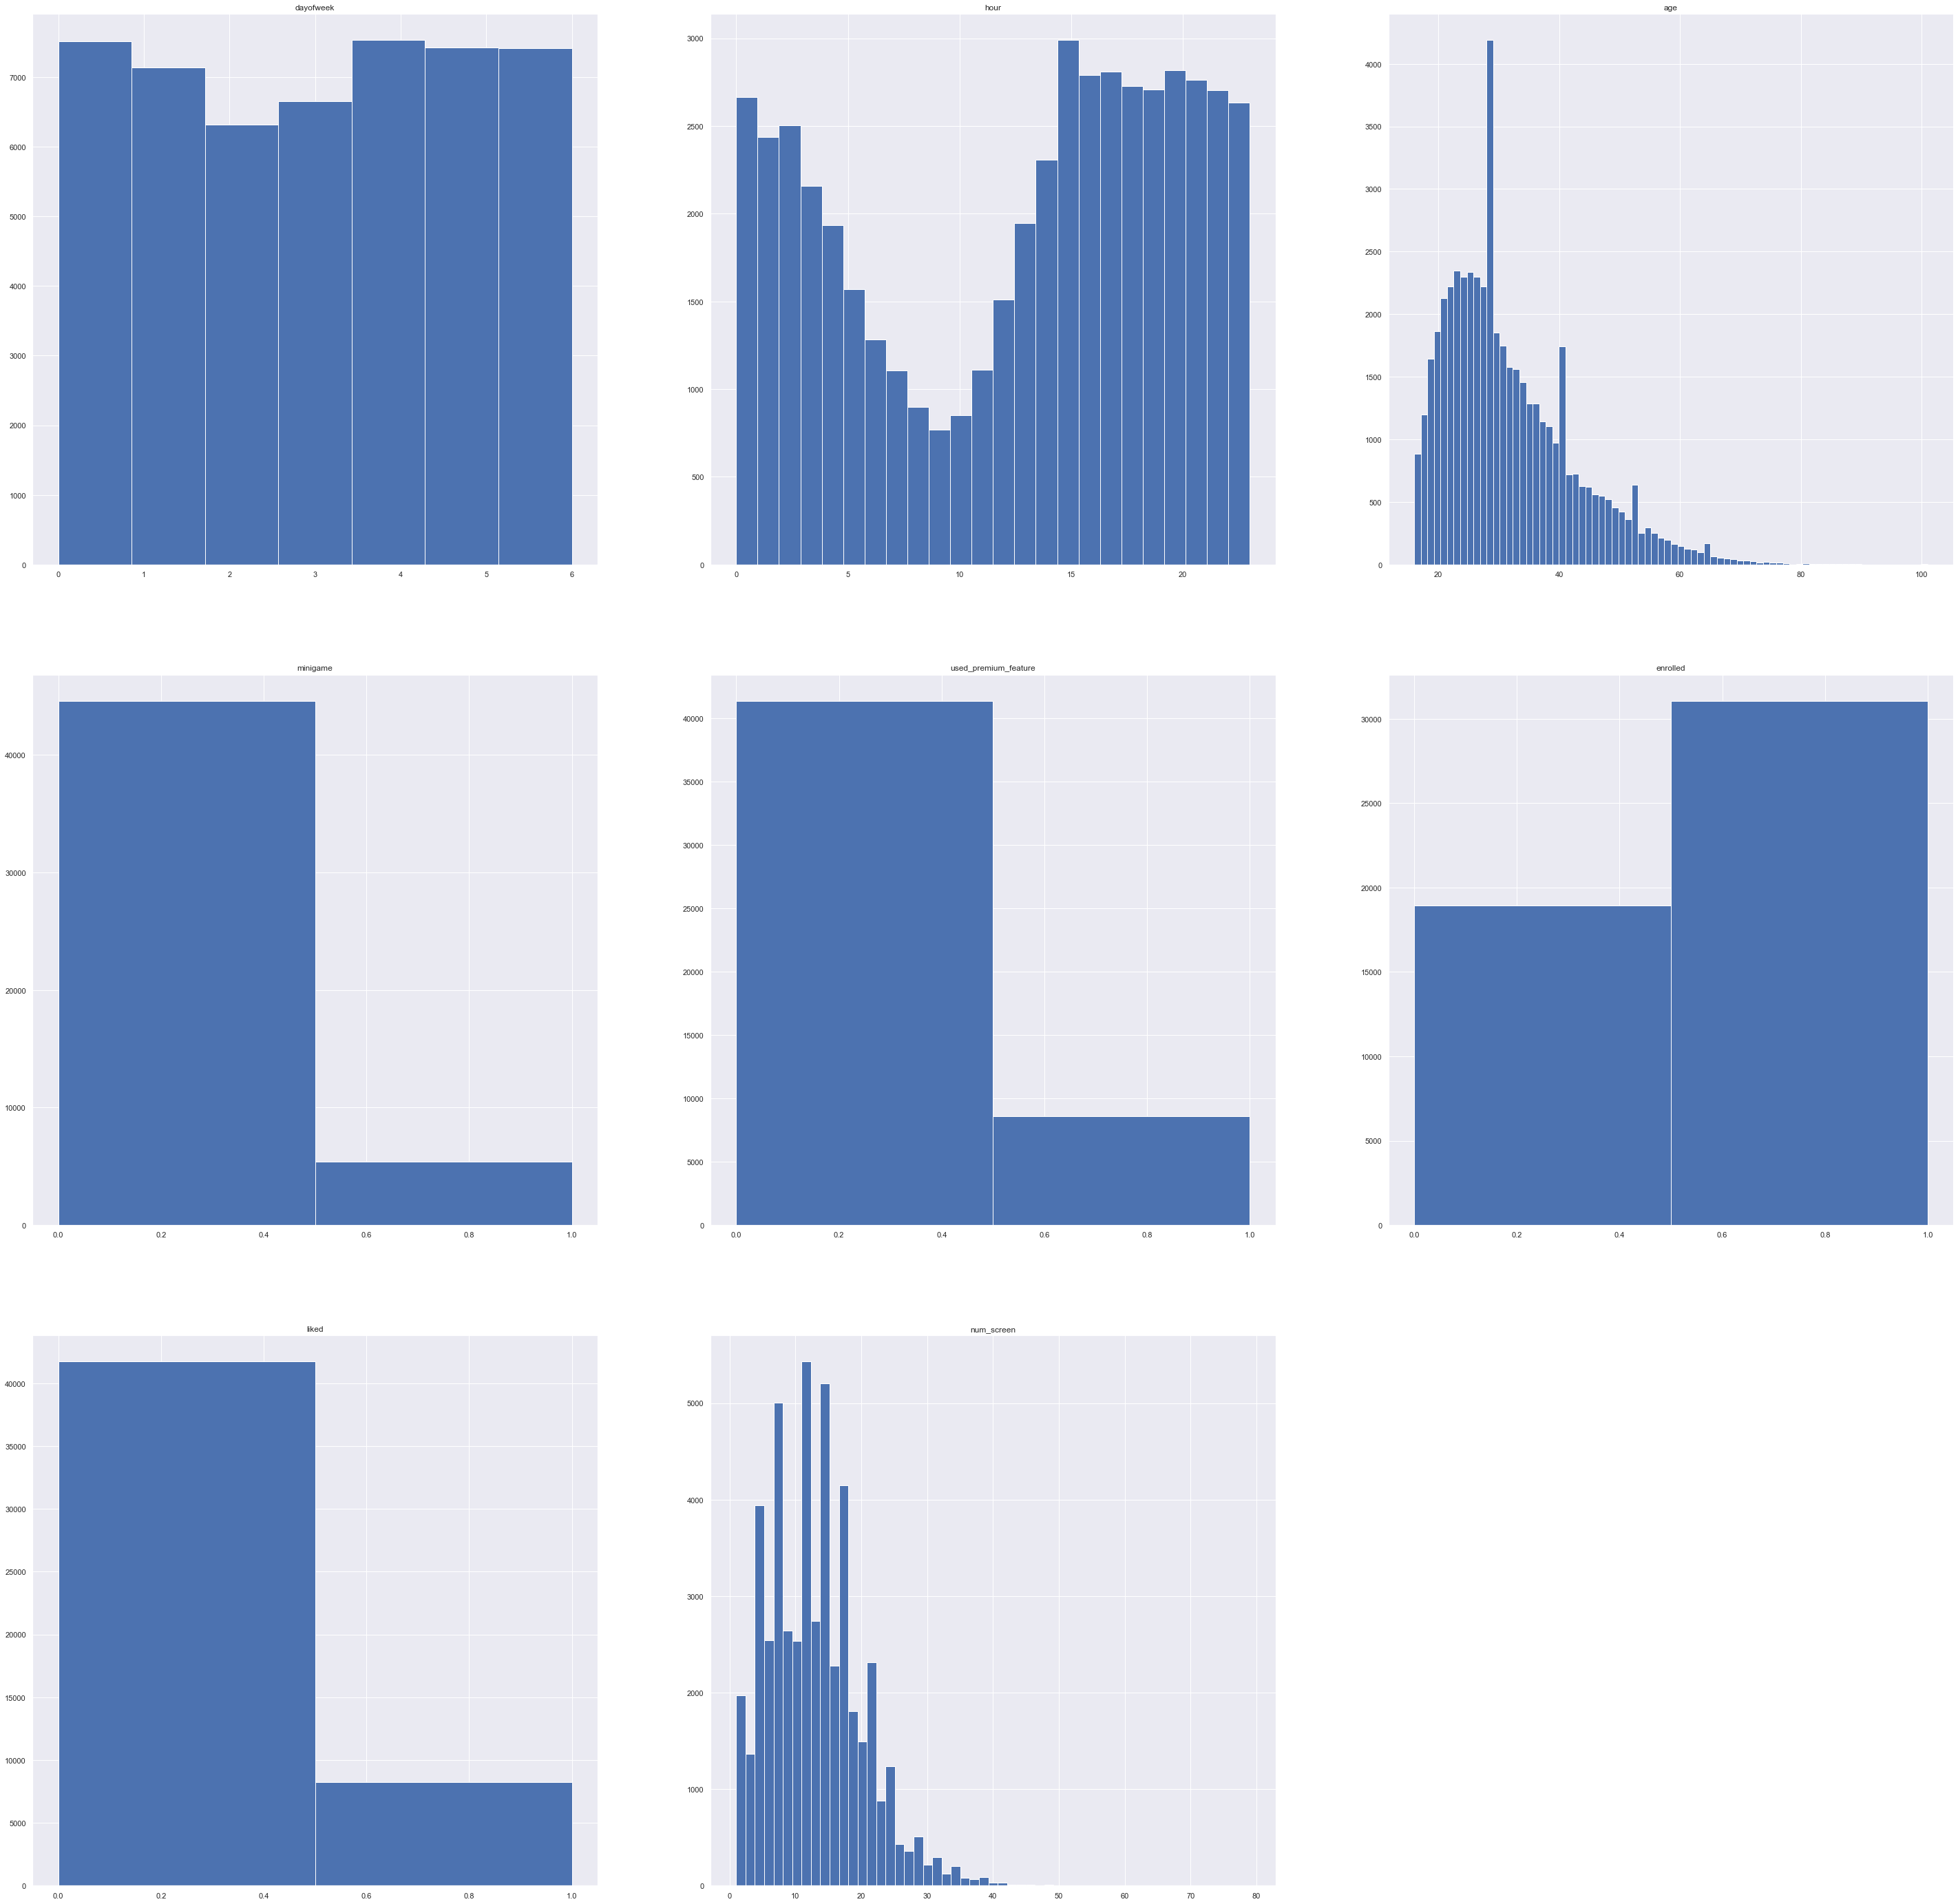

In [33]:
import seaborn as sns
sns.set()
plt.suptitle("Histogram of Numeric Data")
plt.figure(figsize=(50, 50)) 
plt.rcParams.update({'font.size': 1000})
for i in range(0, df_numberic.shape[1]):
    plt.subplot(3, 3, i+1)
    figure = plt.gca()
    figure.set_title(df_numberic.columns.values[i])
    jumlah_bin = np.size(df_numberic.iloc[:, i].unique())
    plt.hist(df_numberic.iloc[:,i], bins = jumlah_bin)   

In [ ]:
plt.suptitle("Histogram of Numeric Data")
plt.figure(figsize=(50, 50)) 
plt.rcParams.update({'font.size': 1000})
for i in range(0, df_numberic.shape[1]):
    plt.subplot(3, 3, i+1)
    figure = plt.gca()
    figure.set_title(df_numberic.columns.values[i])
    jumlah_bin = np.size(df_numberic.iloc[:, i].unique())
    plt.hist(df_numberic.iloc[:,i], bins = jumlah_bin)   

In [39]:
px.histogram(df, "dayofweek", "minigame", color="enrolled", hover_data=df.columns)

In [35]:
px.histogram(df, "hour", "used_premium_feature", color="enrolled", hover_data=df.columns)

In [37]:
px.histogram(df, "age", color="enrolled", hover_data=df.columns)

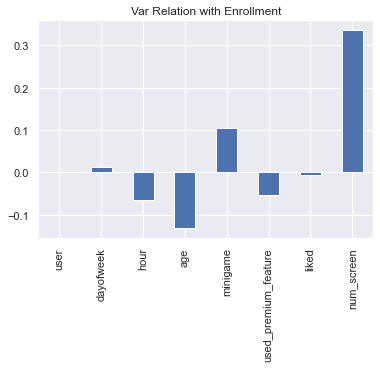

In [42]:
correlation = df.drop(columns=["enrolled"], inplace=False).corrwith(df.enrolled)
correlation.plot.bar(title="Var Relation with Enrollment")

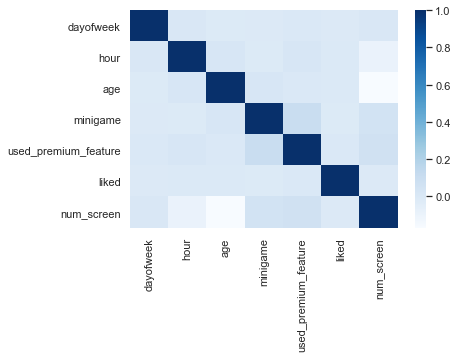

In [44]:
corr_matrix = df_numberic.drop(columns = ['enrolled'], inplace = False).corr()
sns.heatmap(corr_matrix, cmap = 'Blues')